In [75]:
import pandas as pd
import os
import csv
import numpy as np
import yfinance as yf
import time 
import matplotlib.pyplot as plt 

## Extracting Infomation 

In [76]:
#Steps:

#Create dataframe yf_price with yf.download
#Select Close column only (price at market close)
#Calculate percentage changes with pct_change

#itindustry     = ["MMM","AOS", "ABT",'ABBV','ABMD','ACN','ATVI','ADM','ADBE','AAP','AMD','AES', 'AFL', 
 #                 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL','GOOGL', 'GOOG', 
  #                'MO' ,'AMZN']
                
itindustry= ['AAPL', 'AMZN', 'NFLX', 'GOOGL', 'MSFT', 'NVDA', 'TSLA']
#  time period and interval
yf_period   = "20y"   # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
yf_interval = "1d"    # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo

#  1.  Create dataframe yf_price with yf.download
yf_returns = yf.download(
        tickers = itindustry,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by intervaal
        group_by = 'ticker ',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)      


#  2.  Select 'Close' (price at market close) column only
yf_returns = yf_returns.iloc[:, yf_returns.columns.get_level_values(1)=='Close']


#  3.  Remove the dataframe multi-index
yf_returns.columns = yf_returns.columns.droplevel(1)  # multi-index

yf_returns.tail(10)


[*********************100%***********************]  7 of 7 completed


,TSLA,AMZN,NFLX,GOOGL,MSFT,NVDA,AAPL
Date,,,,,,,
2022-11-28,182.919998,93.949997,281.170013,96.050003,241.759995,158.229523,144.220001
2022-11-29,180.830002,92.419998,280.959991,95.190002,240.330002,156.350006,141.169998
2022-11-30,194.699997,96.540001,305.529999,100.989998,255.139999,169.229996,148.029999
2022-12-01,194.699997,95.500000,316.950012,100.989998,254.690002,171.350006,148.309998
2022-12-02,194.860001,94.129997,320.410004,100.440002,255.020004,168.759995,147.809998
2022-12-05,182.449997,91.010002,312.589996,99.480003,250.199997,166.100006,146.630005
2022-12-06,179.820007,88.250000,305.559998,96.980003,245.119995,159.869995,142.910004
2022-12-07,174.039993,88.459999,308.420013,94.940002,244.369995,161.199997,140.940002
2022-12-08,173.440002,90.349998,310.260010,93.709999,247.399994,171.690002,142.649994


In [77]:
GOOGL = yf.Ticker('GOOGL').info
ticker_parameter = pd.DataFrame(GOOGL).transpose()
GOOGL

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 186779,
 'longBusinessSummary': 'Alphabet Inc. provides various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment offers products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube non-advertising services. The Google Cloud segment offers infrastructure, platform, and other services; Google Workspace that include cloud-based collaboration tools for enterprises, such as Gmail, Docs, Drive, Calendar, and Meet; and other se

In [78]:
GOOGL = yf.Ticker('GOOGL').info
ticker_parameter = pd.DataFrame(GOOGL).transpose()
ticker_parameter = ticker_parameter.reset_index() 
ticker_parameter.rename(columns={'index':'PARAMETERS'}, inplace=True)
ticker_parameter.sort_values(by=['PARAMETERS'],inplace=True)
ticker_parameter.reset_index(drop=True, inplace=True)

# remove ".head" to see the full list
print(ticker_parameter.sample(10))
print('\nAmazon (GOOGL) has yf.Ticker parameters available: ', len(ticker_parameter))

                PARAMETERS
52            freeCashflow
12               beta3Year
82   morningStarRiskRating
88                    open
25       dateShortInterest
134             toCurrency
150                website
148             volume24Hr
103      recommendationKey
0             52WeekChange

Amazon (GOOGL) has yf.Ticker parameters available:  154


In [79]:
#  print set parameters
print('SYMBOLS:\n{}\n'.format(itindustry))
print('PERIOD:\t\t{}'.format(yf_period))
print('INTERVAL:\t{}'.format(yf_interval))

SYMBOLS:
['AAPL', 'AMZN', 'NFLX', 'GOOGL', 'MSFT', 'NVDA', 'TSLA']

PERIOD:		20y
INTERVAL:	1d


In [80]:
print('shape: ', yf_returns.shape)

shape:  (5036, 7)


In [81]:
#  4.  calculate percentage changes with "pct_change()"
#  multiply by 100 to get percentage value
#  round off the percentages to 2 decimal points
yf_returns = round(yf_returns.pct_change()*100, 2)


yf_returns.tail(10)

,TSLA,AMZN,NFLX,GOOGL,MSFT,NVDA,AAPL
Date,,,,,,,
2022-11-28,0.03,0.58,-1.53,-1.45,-2.32,-2.72,-2.63
2022-11-29,-1.14,-1.63,-0.07,-0.90,-0.59,-1.19,-2.11
2022-11-30,7.67,4.46,8.75,6.09,6.16,8.24,4.86
2022-12-01,0.00,-1.08,3.74,0.00,-0.18,1.25,0.19
2022-12-02,0.08,-1.43,1.09,-0.54,0.13,-1.51,-0.34
2022-12-05,-6.37,-3.31,-2.44,-0.96,-1.89,-1.58,-0.80
2022-12-06,-1.44,-3.03,-2.25,-2.51,-2.03,-3.75,-2.54
2022-12-07,-3.21,0.24,0.94,-2.10,-0.31,0.83,-1.38
2022-12-08,-0.34,2.14,0.60,-1.30,1.24,6.51,1.21


In [82]:
#  create YEAR, MONTH, WEEK columns in perf_dy
perf_dy = yf_returns
perf_dy['YEAR']  = perf_dy.index.strftime("%Y")     # YEAR
perf_dy['MONTH'] = perf_dy.index.strftime("%Y-%m")  # YEAR-MONTH
perf_dy['WEEK']  = perf_dy.index.strftime("%Y-%U")  # YEAR-WEEK


#  create time dataframes using GROUPBY
perf_yr = perf_dy.groupby('YEAR').sum()
perf_mh = perf_dy.groupby('MONTH').sum()
perf_wk = perf_dy.groupby('WEEK').sum()

#  print index and column names
print("\nperf_dy:\n", perf_dy.index.name, perf_dy.columns.values)
print("\nperf_yr:\n", perf_yr.index.name, perf_yr.columns.values)
print("\nperf_mh:\n", perf_mh.index.name, perf_mh.columns.values)
print("\nperf_wk:\n", perf_wk.index.name, perf_wk.columns.values)


perf_dy:
 Date ['TSLA' 'AMZN' 'NFLX' 'GOOGL' 'MSFT' 'NVDA' 'AAPL' 'YEAR' 'MONTH' 'WEEK']

perf_yr:
 YEAR ['TSLA' 'AMZN' 'NFLX' 'GOOGL' 'MSFT' 'NVDA' 'AAPL']

perf_mh:
 MONTH ['TSLA' 'AMZN' 'NFLX' 'GOOGL' 'MSFT' 'NVDA' 'AAPL']

perf_wk:
 WEEK ['TSLA' 'AMZN' 'NFLX' 'GOOGL' 'MSFT' 'NVDA' 'AAPL']


In [83]:
#  create function to plot market and indexes
import plotly
import plotly.express as px

def plotPerformance(arg):
    df = arg
    
    plt.figure(figsize=(10,8))
    
    #  plot #1
    plt.figure(figsize=(10,6))
    df[itindustry].boxplot()
    plt.ylabel('percent change', fontsize = 14)
    plt.xticks(rotation = 90)
    plt.grid(False)
    plt.show()
     #  plot #2
    plt.figure(figsize=(10,6))
    plt.plot(df[itindustry])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[itindustry], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
    
    
    #  print returns
    print('\nRETURNS FROM {} TO {}:'.format(df.index[0], df.index[-1]))
    for i in itindustry:
        
        print(i,round(df[i].sum(),2))

    return
print('function plotPerformance created')
    

function plotPerformance created


## Question 1. Did Tech stocks go up during COVID19 down recently?

<Figure size 1000x800 with 0 Axes>

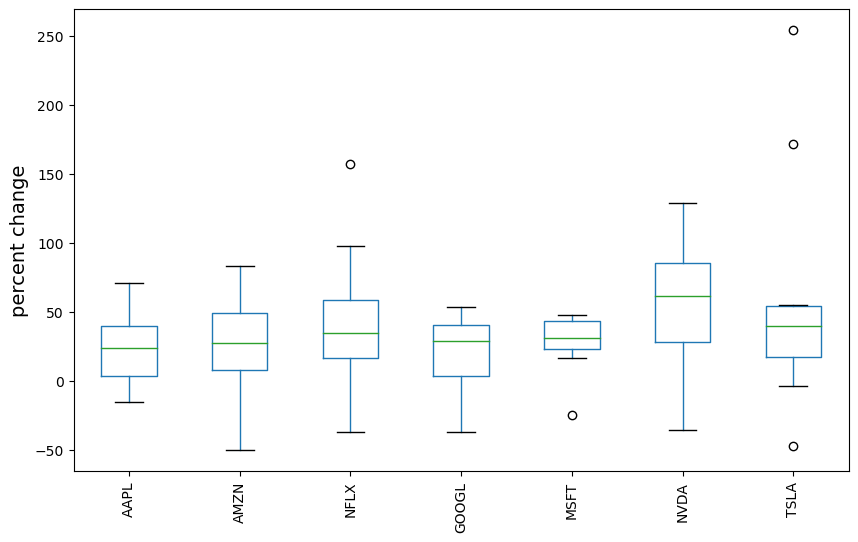

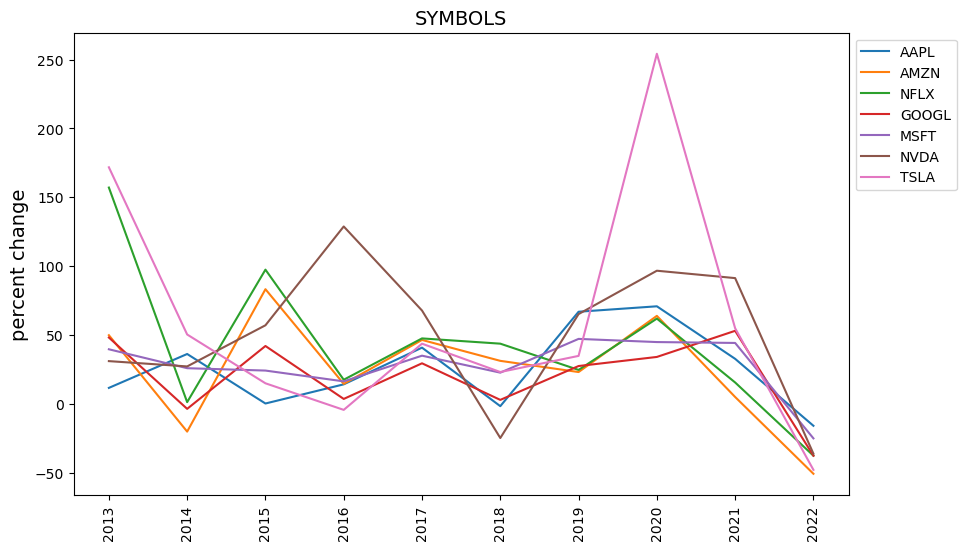


RETURNS FROM 2013 TO 2022:
AAPL 258.33
AMZN 248.79
NFLX 431.15
GOOGL 201.89
MSFT 277.31
NVDA 506.15
TSLA 597.56


In [84]:
plotPerformance(perf_yr.tail(10))  # past 10 years

Based on the data from yFinance, the tech stops went up during COVID and down as of late. There was also high volatility between the stocks. 